# UN-GENERAL DEBATES BLUEPRINT

**LOADING DATASET:**

In [48]:
# Reading the CSV file into a DataFrame
import pandas as pd 
df = pd.read_csv("/Users/hepsiba/Downloads/un-general-debates-blueprint.csv")
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


**REMOVING STOPWORDS:**

In [49]:
# Retrieving the set of English stopwords from the nltk stopwords corpus
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"wouldn't", 'no', 'to', 'about', 'myself', 'mustn', 'were', 'needn', 'whom', 'and', "don't", "doesn't", "you're", 'he', "it's", 'yourself', 'by', 'a', 'my', "shouldn't", 'y', 'those', 'further', 'herself', 'between', 'below', 'but', 's', 'on', 'her', "should've", 're', 'ourselves', 'both', "needn't", 'they', 'won', 'you', 'their', 'aren', 'shan', 'few', 'she', 'under', 'most', 'been', 'again', "isn't", 'own', "wasn't", 'same', "you'll", 'at', 'did', 'wasn', 'doesn', 'then', 'them', 'very', 'will', 'didn', 'ours', "you'd", 'other', 'up', 'yourselves', 'as', "hadn't", 'doing', 'wouldn', 'here', 'above', "that'll", 'having', 'off', 'haven', 'more', 'isn', "mustn't", 'me', 'yours', 'our', 'from', 'we', "you've", 'himself', 'its', 'was', 'the', 'over', "didn't", 'it', 'only', 'couldn', 'this', 'be', 'than', 'that', 'him', 'hers', 'with', 'll', 'or', 'for', 'what', 'your', 'some', "she's", "couldn't", 'are', 'who', 'until', 'while', 'his', 'after', 'hasn', "hasn't", 'ma', 'm', 'if', 'being'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hepsiba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PRE-PROCESSING PIPELINE:**

In [50]:
# Using regular expression to find all words and hyphenated words in the text
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [51]:
# Use list comprehension to filter out tokens that are not in the set of stopwords
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [52]:
# Iterate over each function in the pipeline and apply it to the tokens
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [53]:
# Apply the prepare function to each text in the DataFrame
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

**COUNTING THE TOKENS:**

In [54]:
# Import the Counter class from the collections module
from collections import Counter
# Initialize a Counter object
counter = Counter()
# Map the update method of the Counter object to each list of tokens in the DataFrame column 'tokens'
df['tokens'].map(counter.update)
# Convert the Counter object to a DataFrame with tokens as index and frequency as a column named 'freq'
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
# Filter out tokens with frequency less than 1 (i.e., remove rare tokens)
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
# Sort the DataFrame by frequency in descending order
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


**WORDCLOUD:**

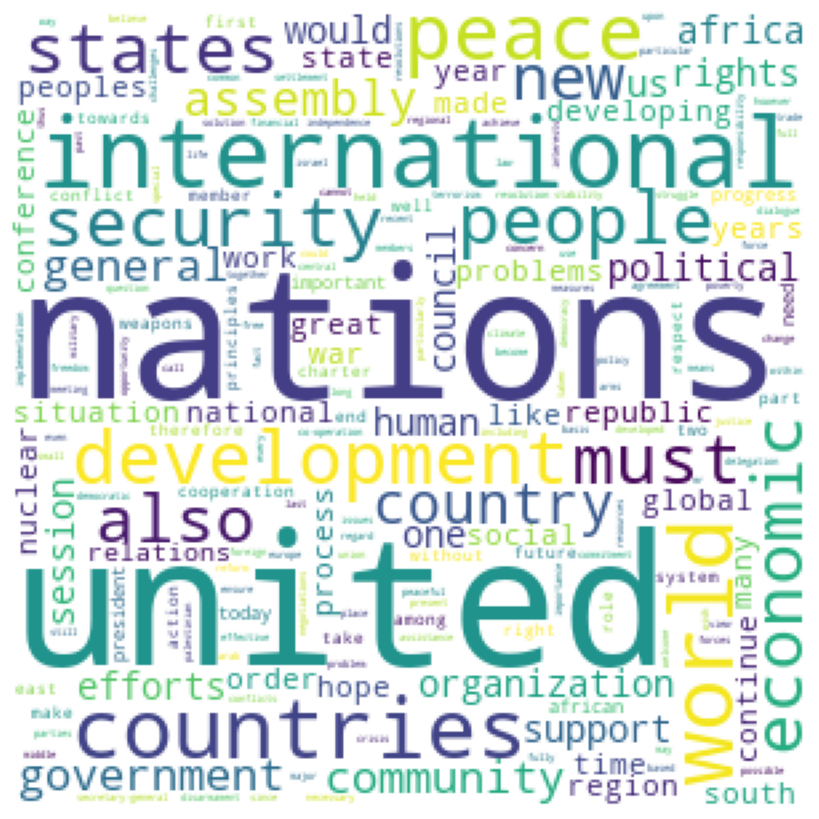

In [55]:
# Import the WordCloud class from the wordcloud module
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, 
margin=2)
# Initialize a WordCloud object with specified parameters
wc.fit_words(freq_df['freq'].to_dict() )
# Set up the plot figure with specified size and background color
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
# Adjust layout for better visualization
plt.tight_layout(pad = 0)
plt.show()

**TFIDF & COMPARE:**

In [56]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [57]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


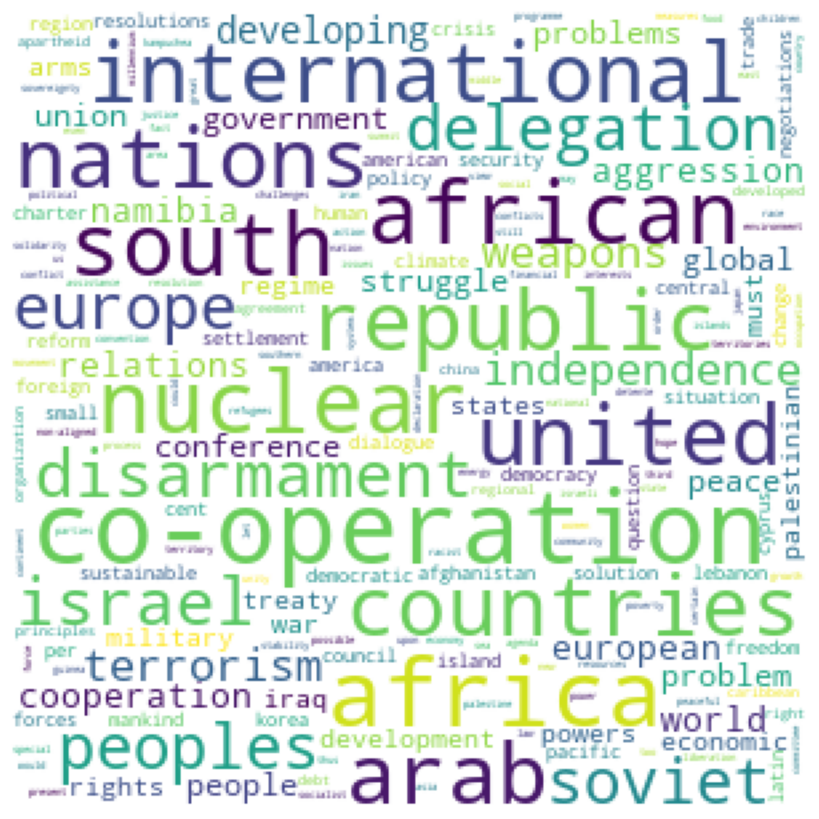

In [58]:
# Initialize a WordCloud object with specified parameters
wc = WordCloud(background_color='white', width = 300, 
height=300, margin=2)
# Generate word cloud using the TF-IDF values of tokens as input
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


**FUNCTION TO COUNT KEYWORDS:**

In [59]:
# Add a new column 'num_tokens' to the DataFrame by mapping the length of tokens in each row
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords): 
    # Filter tokens to include only those in the keywords list
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [60]:
#Count occurrences of keywords in tokens grouped by a specified column.
def count_keywords_by(df, by, keywords, column='tokens'):
 
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
 
    return freq_df.groupby(by=by).sum().sort_values(by)

**FREQUENCY HEATMAP:**

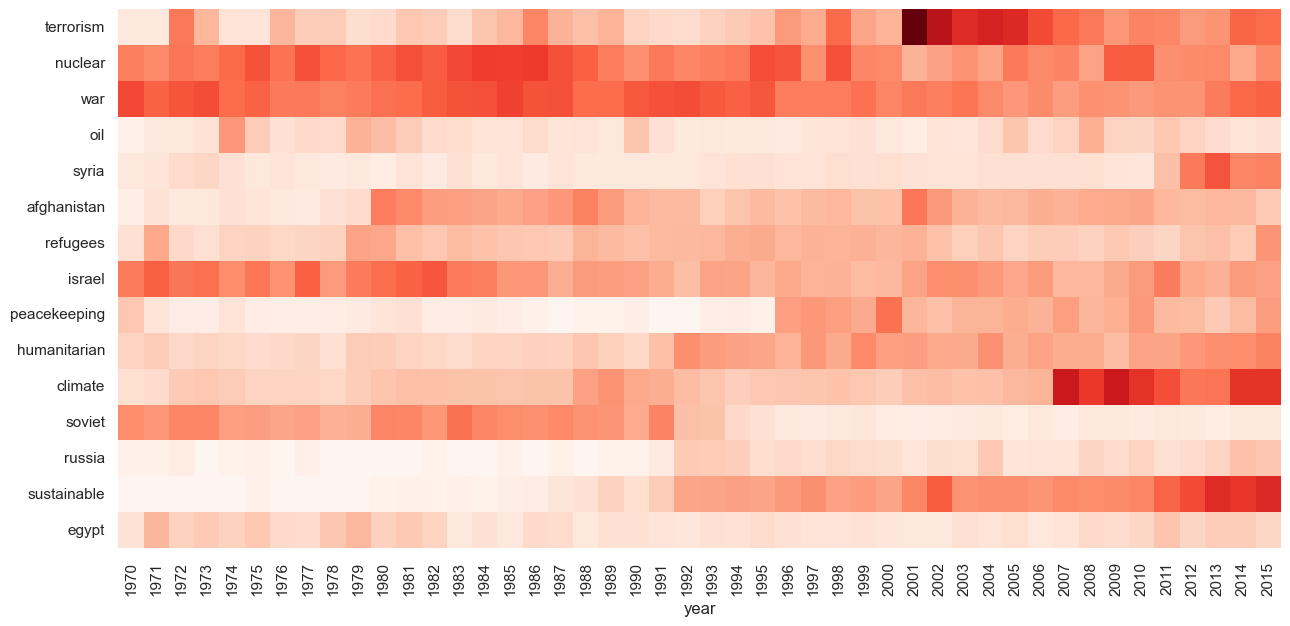

In [61]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt'] 
freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

**FOR THE YEAR 1970:**

**LOADING THE DATASET:**

In [32]:
# Read the CSV file into a DataFrameimport pandas as pd
df = pd.read_csv("/Users/hepsiba/Downloads/un-general-debates-blueprint.csv")
# Filter the DataFrame to include only rows where the 'year' column equals 1970
df= df[df['year']==1970]
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


**REMOVING STOPWORDS:**

In [33]:
# Retrieve the set of stopwords for the English language
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"wouldn't", 'no', 'to', 'about', 'myself', 'mustn', 'were', 'needn', 'whom', 'and', "don't", "doesn't", "you're", 'he', "it's", 'yourself', 'by', 'a', 'my', "shouldn't", 'y', 'those', 'further', 'herself', 'between', 'below', 'but', 's', 'on', 'her', "should've", 're', 'ourselves', 'both', "needn't", 'they', 'won', 'you', 'their', 'aren', 'shan', 'few', 'she', 'under', 'most', 'been', 'again', "isn't", 'own', "wasn't", 'same', "you'll", 'at', 'did', 'wasn', 'doesn', 'then', 'them', 'very', 'will', 'didn', 'ours', "you'd", 'other', 'up', 'yourselves', 'as', "hadn't", 'doing', 'wouldn', 'here', 'above', "that'll", 'having', 'off', 'haven', 'more', 'isn', "mustn't", 'me', 'yours', 'our', 'from', 'we', "you've", 'himself', 'its', 'was', 'the', 'over', "didn't", 'it', 'only', 'couldn', 'this', 'be', 'than', 'that', 'him', 'hers', 'with', 'll', 'or', 'for', 'what', 'your', 'some', "she's", "couldn't", 'are', 'who', 'until', 'while', 'his', 'after', 'hasn', "hasn't", 'ma', 'm', 'if', 'being'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hepsiba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PRE-PROCESSING PIPELINE:**

In [34]:
# Define a function named tokenize that takes a text input
# The function uses regular expressions to tokenize the text
# Tokens are sequences of word characters (including hyphens) that contain at least one letterimport regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [35]:
# Define a function named remove_stop that takes a list of tokens as input
# The function filters out tokens that are in lowercase form of stopwords
# Stopwords are common words in English language that are often excluded from text analysis
# The function returns a list of tokens without stopwords
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [36]:
# Define a function named prepare that takes a piece of text and a pipeline of functions as input
# The function applies each function in the pipeline to the text sequentially
# It returns the preprocessed tokens after all functions in the pipeline have been appliedpipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [37]:
# Create a new column named 'tokens' in the DataFrame df
# Apply the prepare function to each text in the 'text' column of df using the specified pipeline of functions
# The result is a series of preprocessed tokens, which are assigned to the 'tokens' column
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

**COUNTING THE TOKENS:**

In [38]:
from collections import Counter
counter = Counter()
# Apply the update method of the Counter object to each row in the 'tokens' column of the DataFrame df
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
# Filter out tokens with frequency less than 1
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
# Sort the DataFrame by frequency in descending order
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,1997
united,1996
international,1251
world,1093
peace,970
countries,908
states,896
organization,762
would,677


**WORDCLOUD:**

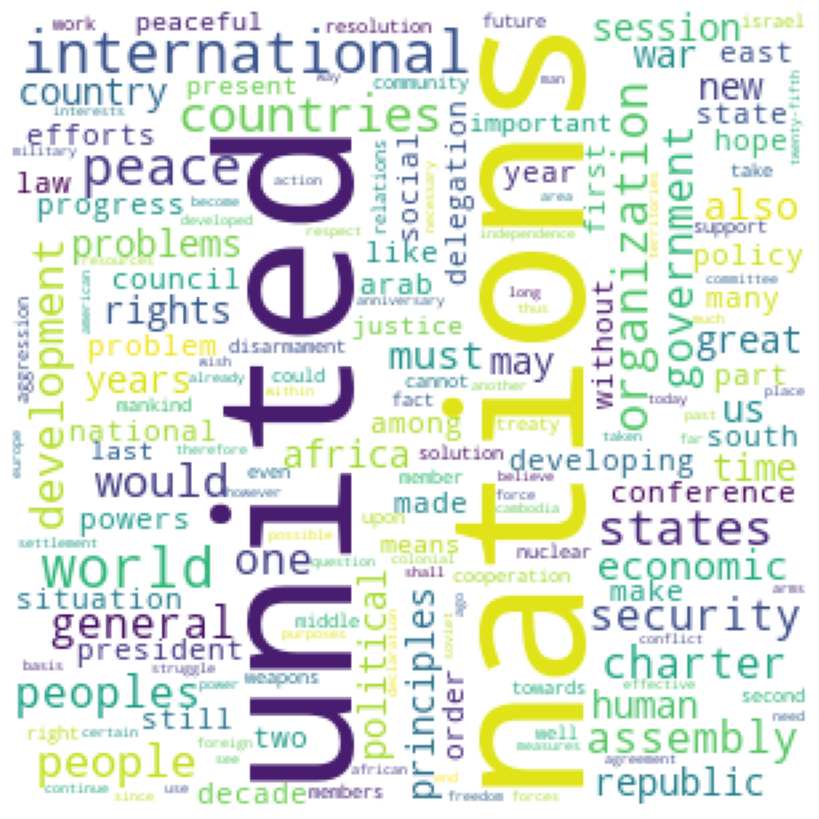

In [39]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
# Initialize a WordCloud object with specified parameters
wc = WordCloud(background_color='white', width = 300, height=300, 
margin=2)
# Generate word cloud using the frequencies of tokens as input
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
# Turn off the axes
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**TFIDF & COMPARE:**

In [40]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [41]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,1997,199.7
united,1996,199.6
international,1251,125.1
world,1093,109.3
peace,970,97.0


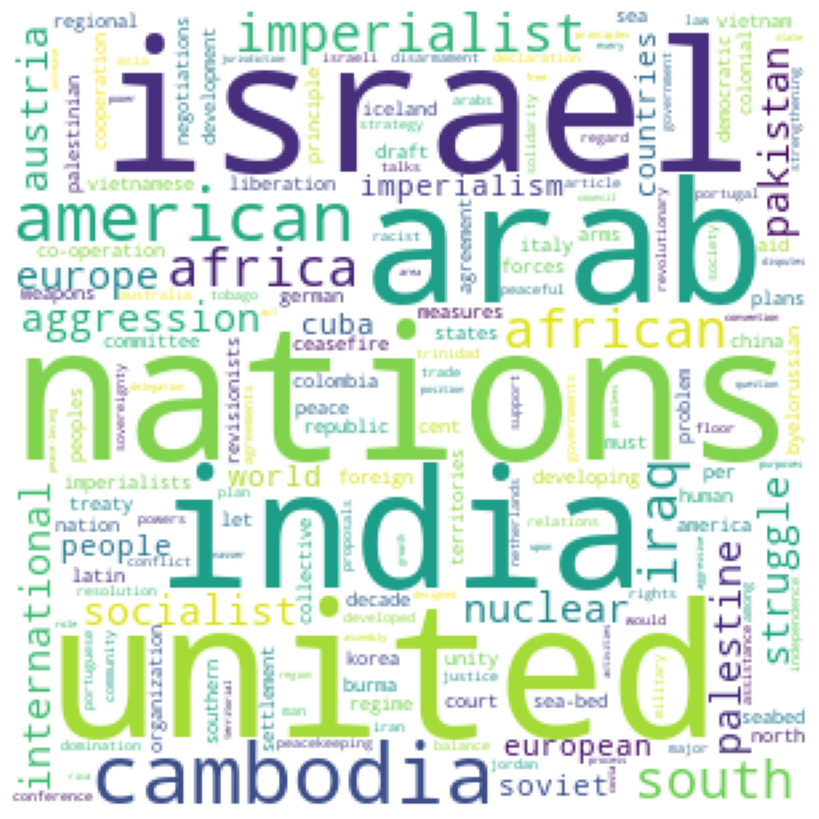

In [42]:
# Initialize a WordCloud object with specified parameters
wc = WordCloud(background_color='white', width = 300, 
height=300, margin=2)
# Generate word cloud using the TF-IDF values of tokens as input
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


**FUNCTION TO COUNT KEYWORDS:**

In [43]:
# Add a new column 'num_tokens' to the DataFrame by mapping the length of tokens in each row
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords): 
    # Filter tokens to include only those in the keywords list
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [44]:
#Count occurrences of keywords in tokens grouped by a specified column.
def count_keywords_by(df, by, keywords, column='tokens'):
 
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
 
    return freq_df.groupby(by=by).sum().sort_values(by)

**FREQUENCY HEATMAPS:**

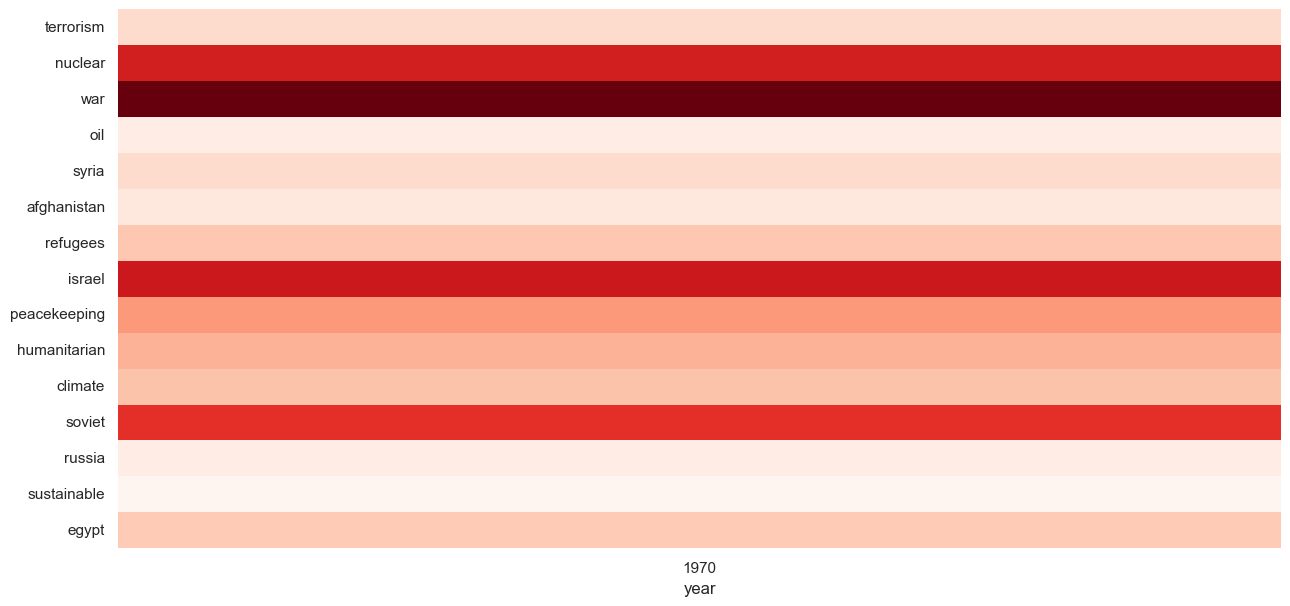

In [45]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt'] 
freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)